### Used to create small_dataset

In [ ]:
import os
import shutil

# Path to the directory containing subfolders with label names
source_dir = "/content/drive/MyDrive/VIT/smalldata"

# Path to the directory where you want to save the small dataset
destination_dir = "/content/drive/MyDrive/VIT"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Get a list of subfolders (label names) in the source directory
subfolders = [f.name for f in os.scandir(source_dir) if f.is_dir()]

# Loop through each subfolder and copy 20 images to the destination directory
for subfolder in subfolders:
    subfolder_path = os.path.join(source_dir, subfolder)
    image_files = [f.name for f in os.scandir(subfolder_path) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png','.JPG'))]

    # Ensure there are at least 20 images in the subfolder
    if len(image_files) >= 20:
        selected_images = image_files[:20]
    else:
        selected_images = image_files

    # Create a subfolder in the destination directory for the current label
    destination_subfolder = os.path.join(destination_dir, subfolder)
    os.makedirs(destination_subfolder, exist_ok=True)

    # Copy selected images to the destination subfolder
    for image in selected_images:
        source_image_path = os.path.join(subfolder_path, image)
        destination_image_path = os.path.join(destination_subfolder, image)

        shutil.copy(source_image_path, destination_image_path)

print("Data copied successfully!")

### Used for converting all to jpg format

In [ ]:
import os
from PIL import Image
import shutil

# Path to the directory containing the dataset with class folders
data_dir = "/content/drive/MyDrive/VIT/smalldata"
output_dir = "/content/drive/MyDrive/VIT/smalldata_jpg"  # New directory for converted images

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to convert image files to JPG format while maintaining RGB format
def convert_images_to_jpg(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpeg', '.jpg','.JPG')):
                image_path = os.path.join(root, file)
                output_subdir = os.path.relpath(root, directory)  # Maintain subdirectory structure
                output_subdir_path = os.path.join(output_dir, output_subdir)
                if not os.path.exists(output_subdir_path):
                    os.makedirs(output_subdir_path)

                image = Image.open(image_path)

                # Ensure RGB format
                if image.mode != "RGB":
                    image = image.convert("RGB")

                jpg_path = os.path.join(output_subdir_path, os.path.splitext(file)[0] + ".jpg")
                image.save(jpg_path, "JPEG")
                print(f"Converted and saved: {image_path} -> {jpg_path}")

# Convert images in the data directory and its subfolders
convert_images_to_jpg(data_dir)

print("Image conversion to .jpg format (RGB) and copying to new directory completed.")


### VIT start from here

In [1]:
pip install -U tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/VIT

/content/drive/MyDrive/VIT


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## no need to run the code below if u created text,train and valid folder already

In [ ]:
from PIL import Image
import os

def verify_images(directory):
    error_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError) as e:
                error_images.append((image_path, str(e)))

    return error_images

if __name__ == "__main__":
    label_directory = "/content/drive/MyDrive/VIT/smalldata"
    errors = verify_images(label_directory)

    if errors:
        print("Errors found in the following images:")
        for image_path, error_message in errors:
            print(f"Image: {image_path}, Error: {error_message}")
    else:
        print("No errors found in the images.")


In [ ]:
import os
import shutil
import random

# Path to the directory containing the dataset with class folders
data_dir = "label"

# Create the train, test, and valid folders if they don't exist
train_dir = "train"
test_dir = "test"
valid_dir = "valid"
#for folder in [train_dir, test_dir, valid_dir]:
    ##os.makedirs(folder)

# List all class folders
class_folders = sorted(os.listdir(data_dir))

# Specify the split ratio for train, test, and valid sets
train_ratio = 0.7
test_ratio = 0.2
valid_ratio = 0.1

# Loop through each class folder
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    class_images = os.listdir(class_path)

    # Shuffle the images to split randomly
    random.shuffle(class_images)

    # Calculate the number of images for each split
    num_images = len(class_images)
    num_train = int(train_ratio * num_images)
    num_test = int(test_ratio * num_images)
    num_valid = num_images - num_train - num_test

    # Split the images into train, test, and valid sets
    train_images = class_images[:num_train]
    test_images = class_images[num_train:num_train + num_test]
    valid_images = class_images[num_train + num_test:]

    # Move the images to their respective folders
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(train_dir, class_folder, image)
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(test_dir, class_folder, image)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in valid_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(valid_dir, class_folder, image)
        os.makedirs(os.path.join(valid_dir, class_folder), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Dataset split into train, test, and valid sets successfully.")


FileNotFoundError: ignored

## Main model from here

In [ ]:
#import tensorflow as tf
#rgb_image="smalldata"
# Assuming your original grayscale image is stored in the variable 'gray_image'
#resized_image = tf.image.resize(rgb_image, [32, 32,3])#pixel divide...etc...
#resized_image = tf.expand_dims(resized_image, axis=-1)  # Add the channel dimension


In [16]:
import os
import shutil
import random
from PIL import Image
import numpy as np

# Path to the directory containing the dataset with class folders
data_dir = "/content/drive/MyDrive/VIT/smalldata"

# Create the train, test, and valid folders if they don't exist
train_dir = "train"
test_dir = "test"
valid_dir = "valid"
#for folder in [train_dir, test_dir, valid_dir]:
  #  if not os.path.exists(folder):
     #   os.makedirs(folder)

# List all class folders
class_folders = sorted(os.listdir(data_dir))

# Specify the split ratio for train, test, and valid sets
train_ratio = 0.7
test_ratio = 0.1
valid_ratio = 0.2

# Initialize lists to hold images and labels
x_train = []
y_train = []
x_test = []
y_test = []
x_valid = []
y_valid = []

num_classes = 26
input_shape = (72, 72, 3)

# Create a list to hold paths of skipped images
skipped_images = []

# Load and preprocess image with enhanced error handling
def preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize(input_shape[:2])  # Resize to input_shape
        img_array = np.array(img)
        return img_array
    except (IOError, OSError) as e:
        print(f"Skipping image: {image_path} due to error: {e}")
        skipped_images.append(image_path)  # Add the skipped image path
        return None

# Loop through each class folder
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    class_images = os.listdir(class_path)

    # Shuffle the images to split randomly
    random.shuffle(class_images)

    # Calculate the number of images for each split
    num_images = len(class_images)
    num_train = int(train_ratio * num_images)
    num_test = int(test_ratio * num_images)
    num_valid = num_images - num_train - num_test

    # Split the images into train, test, and valid sets
    train_images = class_images[:num_train]
    test_images = class_images[num_train:num_train + num_test]
    valid_images = class_images[num_train + num_test:]

    # Preprocess and load train images
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(train_dir, class_folder, image)
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)

        # Skip image processing if it fails
        img_array = preprocess_image(src_path)
        if img_array is None:
            continue  # Skip this image

        shutil.copy(src_path, dst_path)
        x_train.append(img_array)
        y_train.append(class_folder)

    # Preprocess and load test images
    for image in test_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(test_dir, class_folder, image)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

        # Skip image processing if it fails
        img_array = preprocess_image(src_path)
        if img_array is None:
            continue  # Skip this image

        shutil.copy(src_path, dst_path)
        x_test.append(img_array)
        y_test.append(class_folder)

    # Preprocess and load valid images
    for image in valid_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(valid_dir, class_folder, image)
        os.makedirs(os.path.join(valid_dir, class_folder), exist_ok=True)

        # Skip image processing if it fails
        img_array = preprocess_image(src_path)
        if img_array is None:
            continue  # Skip this image

        shutil.copy(src_path, dst_path)
        x_valid.append(img_array)
        y_valid.append(class_folder)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

# Print the total number of skipped images
print(f"Skipped {len(skipped_images)} images due to errors.")

# Save skipped image paths to a text file
skipped_file_path = "skipped_images.txt"
with open(skipped_file_path, 'w') as f:
    for img_path in skipped_images:
        f.write(img_path + '\n')

print("Dataset split into train, test, and valid sets successfully.")
print(f"Skipped image paths saved to: {skipped_file_path}")


Skipped 0 images due to errors.
Dataset split into train, test, and valid sets successfully.
Skipped image paths saved to: skipped_images.txt


### Code that are commented out were left for debugging, No need to run them, You may delete them if everything work perfectly,


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# num_classes = 26
# input_shape = (32, 32, 1)


# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     'train',
#     target_size=input_shape[:2],
#     batch_size=32,
#     class_mode='categorical',
#     color_mode='grayscale')

# test_generator = test_datagen.flow_from_directory(
#     'test',
#     target_size=input_shape[:2],
#     batch_size=32,
#     class_mode='categorical',
#     color_mode='grayscale')

# valid_generator = valid_datagen.flow_from_directory(
#     'valid',
#     target_size=input_shape[:2],
#     batch_size=32,
#     class_mode='categorical',
#     color_mode='grayscale')
# x_train, _ = next(train_generator)

# print(f"train_generator shape: {train_generator.image_shape}")
# print(f"test_generator shape: {test_generator.image_shape}")
# print(f"valid_generator shape: {valid_generator.image_shape}")


In [ ]:

# from keras.preprocessing.image import ImageDataGenerator

# num_classes = 26
# input_shape = (32, 32, 1)
# batch_size = 32  # you can change this according to your system's capabilities

# # create an image data generator object
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescaling pixel values and setting up a validation split

# # Generator for training data
# train_generator = datagen.flow_from_directory(
#     'label',
#     target_size=input_shape[:2],
#     color_mode="grayscale",  # if your images are color, use "rgb"
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training')  # set as training data

# # Generator for validation data
# validation_generator = datagen.flow_from_directory(
#     'label',  # same directory as training data
#     target_size=input_shape[:2],
#     color_mode="grayscale",  # if your images are color, use "rgb"
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation')  # set as validation data

# print(f"x_train shape: {train_generator.image_shape} - y_train shape: {train_generator.batch_size}")
# print(f"x_val shape: {validation_generator.image_shape} - y_val shape: {validation_generator.batch_size}")


Found 4015 images belonging to 26 classes.
Found 996 images belonging to 26 classes.
x_train shape: (32, 32, 1) - y_train shape: 32
x_val shape: (32, 32, 1) - y_val shape: 32


### change epoch down here  ***Read comments, this is important step for FIne-tuning***

In [30]:
learning_rate = 0.001
num_classes = 26 # number of you class
input_shape = (72, 72, 3) #defualt shape for this model, Usually 32,32 is for RGB images but since you are using Greyscale, ur images are 200,300, in later step I have converted them to 32,32,1
weight_decay = 0.0001
batch_size = 32  #you can insrease this for faster but may exhaustGPU if increased too much
num_epochs = 30 # change this 100 or more if possible, add more epochs for better result (Increase this)
image_size = 72 #use this in shape
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [2048, 1024]


In [31]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

# Get a batch of data


# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# # Modify these hyperparameters as per your requirements
# image_size = 72

# # Assuming you have already loaded your dataset into x_train and y_train
# # Replace x_train with your actual training data

# # Data augmentation and preprocessing
# data_augmentation = tf.keras.Sequential(
#     [
#         layers.experimental.preprocessing.Normalization(),
#         layers.experimental.preprocessing.Resizing(image_size, image_size),
#         layers.experimental.preprocessing.RandomFlip("horizontal"),
#         layers.experimental.preprocessing.RandomRotation(factor=0.02),
#         layers.experimental.preprocessing.RandomZoom(
#             height_factor=0.2, width_factor=0.2
#         ),
#     ],
#     name="data_augmentation",
# )

# # Compute the mean and the variance of the training data for normalization.
# data_augmentation.layers[0].adapt(x_train)


In [32]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [33]:


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


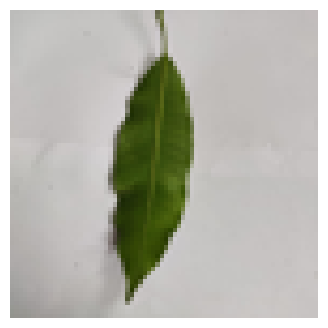

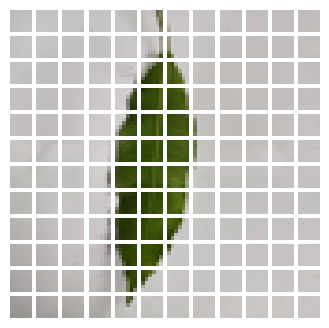

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np



# Choose a random image from x_train
image_index = np.random.choice(range(x_train.shape[0]))
image = x_train[image_index]

# Ensure image has three dimensions (height, width, channels)
if len(image.shape) == 2:
    image = np.expand_dims(image, axis=-1)
elif image.shape[0] == 3:
    image = np.transpose(image, (1, 2, 0))

plt.figure(figsize=(4, 4))
plt.imshow(image.astype("uint8"))
plt.axis("off")

# Add batch dimension and resize
resized_image = tf.image.resize(tf.expand_dims(image, axis=0), size=(image_size, image_size))

# Extract patches
patches = Patches(patch_size)(resized_image)

print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

# Display the patches
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import numpy as np

# # Define your Patches class here if needed...

# plt.figure(figsize=(4, 4))
# # Get a batch of data
# x_sample= x_train
# # Select the first image from this batch
# image = x_sample[0]
# plt.imshow(image, cmap='gray')  # cmap='gray' for grayscale images
# plt.axis("off")

# # Ensure the image has 4 dimensions: [batch_size, height, width, channels]
# image = np.expand_dims(image, axis=0)

# resized_image = tf.image.resize(
#     image, size=[image_size, image_size]
# )

# patches = Patches(patch_size)(resized_image)
# print(f"Image size: {image_size} X {image_size}")
# print(f"Patch size: {patch_size} X {patch_size}")
# print(f"Patches per image: {patches.shape[1]}")
# print(f"Elements per patch: {patches.shape[-1]}")

# n = int(np.sqrt(patches.shape[1]))
# plt.figure(figsize=(4, 4))
# for i, patch in enumerate(patches[0]):
#     ax = plt.subplot(n, n, i + 1)
#     patch_img = tf.reshape(patch, (patch_size, patch_size))
#     plt.imshow(patch_img.numpy(), cmap='gray')
#     plt.axis("off")


In [22]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model

# Create the VIT model
vit_model = create_vit_classifier()
vit_model.summary()


### Below two cells are for debugging, if u don't face error no need to run them

In [25]:
tf.config.experimental_run_functions_eagerly(True) #run this once if error related to "history" occurs


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [26]:
# Run this if error related to string or integer occurs
# Create a mapping from class names to integer labels
class_to_label = {class_name: i for i, class_name in enumerate(class_folders)}

# Convert string labels to integers for train, test, and valid sets
y_train = np.array([class_to_label[label] for label in y_train])
y_test = np.array([class_to_label[label] for label in y_test])
y_valid = np.array([class_to_label[label] for label in y_valid])

print("Class labels converted to integer labels successfully.")

# Define the number of classes
num_classes = len(class_to_label)


Class labels converted to integer labels successfully.


In [ ]:
num_classes

26

### this cell is for running and testing the VIT model

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    # Predict the test data
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    # Convert integer labels to class names for F1 score calculation
    y_test_class_names = [class_folders[i] for i in y_test]
    y_pred_class_names = [class_folders[i] for i in y_pred_labels]
    f1 = f1_score(y_test_class_names, y_pred_class_names, average="weighted")
    print(f"Weighted F1 score: {f1}")
    classification_rep = classification_report(
        y_test_class_names, y_pred_class_names, target_names=class_folders
    )

    print("Classification Report:\n")
    print(classification_rep)
    return history

# Create the ViT classifier model
vit_classifier = create_vit_classifier()

# Run the experiment
history = run_experiment(vit_classifier)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 [==============================] - 12s 632ms/step - loss: 6.2278 - accuracy: 0.1439 - top-5-accuracy: 0.4293 - val_loss: 8.0284 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0667
Epoch 2/30
13/13 [==============================] - 7s 548ms/step - loss: 4.7103 - accuracy: 0.2475 - top-5-accuracy: 0.6086 - val_loss: 8.6281 - val_accuracy: 0.0667 - val_top-5-accuracy: 0.0667
Epoch 3/30
13/13 [==============================] - 7s 512ms/step - loss: 3.6542 - accuracy: 0.2677 - top-5-accuracy: 0.5833 - val_loss: 7.1068 - val_accuracy: 0.0667 - val_top-5-accuracy: 0.0667
Epoch 4/30
13/13 [==============================] - 6s 442ms/step - loss: 3.0126 - accuracy: 0.3359 - top-5-accuracy: 0.6995 - val_loss: 6.4666 - val_accuracy: 0.0667 - val_top-5-accuracy: 0.0667
Epoch 5/30
13/13 [==============================] - 7s 518ms/step - loss: 2.4578 - accuracy: 0.3763 - top-5-accuracy: 0.7626 - val_loss: 6.6870 - val_accuracy: 0.0667 - val_top-5-accuracy: 0.0667
Epoch 6/30
13/13 [========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


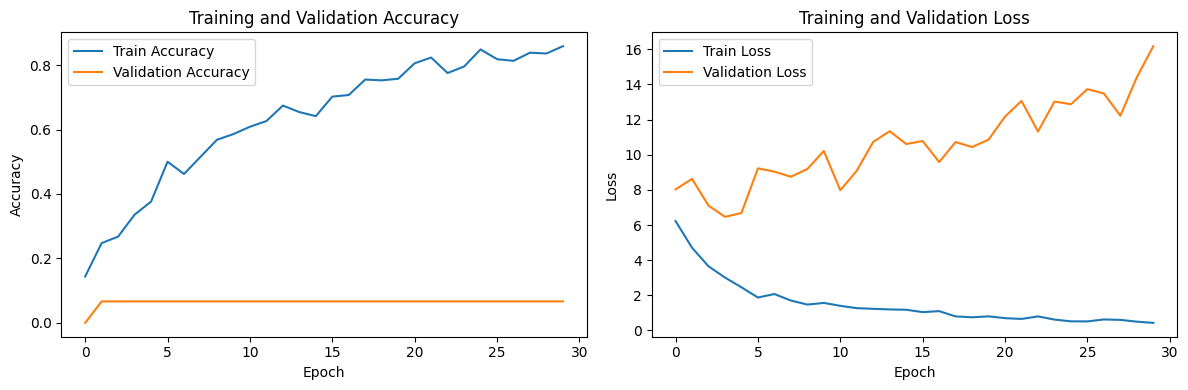

In [35]:

# Plot accuracy and loss graphs
plot_accuracy_and_loss(history)


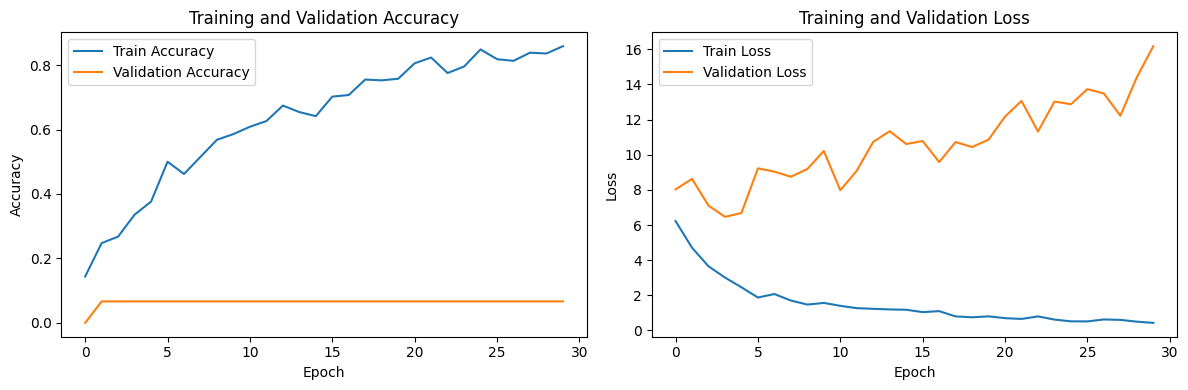

In [29]:
import matplotlib.pyplot as plt

# ... (Your existing code for imports and functions)

def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 4))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



# Plot training and validation accuracy and loss
plot_accuracy_and_loss(history)


In [ ]:
import pandas as pd

# Save classification report to a CSV file
classification_report_df = pd.DataFrame(classification_report(
    y_test_class_names, y_pred_class_names, target_names=class_folders, output_dict=True
))
classification_report_df.to_csv("classification_report.csv", index=True)

print("Classification Report saved to: classification_report.csv")

NameError: ignored

In [ ]:
model_path = "/content/drive/MyDrive/VIT/models" # add the model path where to save
vit_classifier.save(model_path)

### Testing

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/model")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_input_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(72, 72), color_mode="rgb")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array


In [ ]:
import tensorflow as tf
import numpy as np

# Load the SavedModel
model = tf.keras.models.load_model('/content/drive/MyDrive/model')

# Preprocess the image
def preprocess_input_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(72, 72))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Apply the same normalization used during training
    preprocessed_img = data_augmentation.layers[0](img_array)
    return preprocessed_img

# Replace with the path to your image
image_path = "/content/drive/MyDrive/VIT/train/baper bari/Bbari (242).jpg"

preprocessed_image = preprocess_input_image(image_path)
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class index: {predicted_class}")


1/1 [==============================] - 0s 149ms/step
Predicted class index: 4


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
import tensorflow as tf
import numpy as np

# Load the SavedModel
model = tf.keras.models.load_model('/content/drive/MyDrive/model')

# Preprocess the image
def preprocess_input_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(72, 72))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = tf.keras.applications.vgg16.preprocess_input(img_array)
    return preprocessed_img

# Replace with the path to your image
image_path = "/content/drive/MyDrive/VIT/train/King Brunei/King Brunei (15).jpg"

preprocessed_image = preprocess_input_image(image_path)
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])

# Map class indices to class names
class_names = ['African Jambo', 'Amrupali', 'Bari 11', 'Bari 13', 'Bari 4', 'Bari 7', 'Bari 8', 'Bari 9', 'Fazlee', 'GopalVog', 'Hari-Bhanga', 'Himsagor', 'Indian Totapori', 'Kacha mitha', 'King Brunei', 'Lengra', 'Modhurani', 'Moriyam', 'Philippine Honey Dew', 'Qzai', 'Red Palmar', 'Sabira', 'Taiwani red', 'Thai Morium', 'Thai banana Mango', 'baper bari']  # Define your class names here

predicted_class_name = class_names[predicted_class]

print(f"Predicted class name: {predicted_class_name}")


1/1 [==============================] - 0s 146ms/step
Predicted class name: Bari 4


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
import os

# Path to the directory containing the dataset with class folders
data_dir = "/content/drive/MyDrive/VIT/smalldata_jpg"

# List all class folders
class_folders = sorted(os.listdir(data_dir))

# Get the class names in the order they appear in the dataset
class_names = class_folders

print("Class names in order:")
print(class_names)



Class names in order:
['African Jambo', 'Amrupali', 'Bari 11', 'Bari 13', 'Bari 4', 'Bari 7', 'Bari 8', 'Bari 9', 'Fazlee', 'GopalVog', 'Hari-Bhanga', 'Himsagor', 'Indian Totapori', 'Kacha mitha', 'King Brunei', 'Lengra', 'Modhurani', 'Moriyam', 'Philippine Honey Dew', 'Qzai', 'Red Palmar', 'Sabira', 'Taiwani red', 'Thai Morium', 'Thai banana Mango', 'baper bari']
